In [128]:
# Data Preprocessing Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Categorical Encoding
from sklearn.preprocessing import LabelEncoder

# Handling Imbalanced Data
from sklearn.utils import resample

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Model Preparation
from sklearn.model_selection import train_test_split

# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [129]:
# Have a look at the dataset
brain_df = pd.read_csv('full_data.csv')
brain_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [130]:
brain_df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [131]:
# Look at the different columns in the dataframe
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## Look at the Numerical Columns
Pairplot

distplot

jointplot

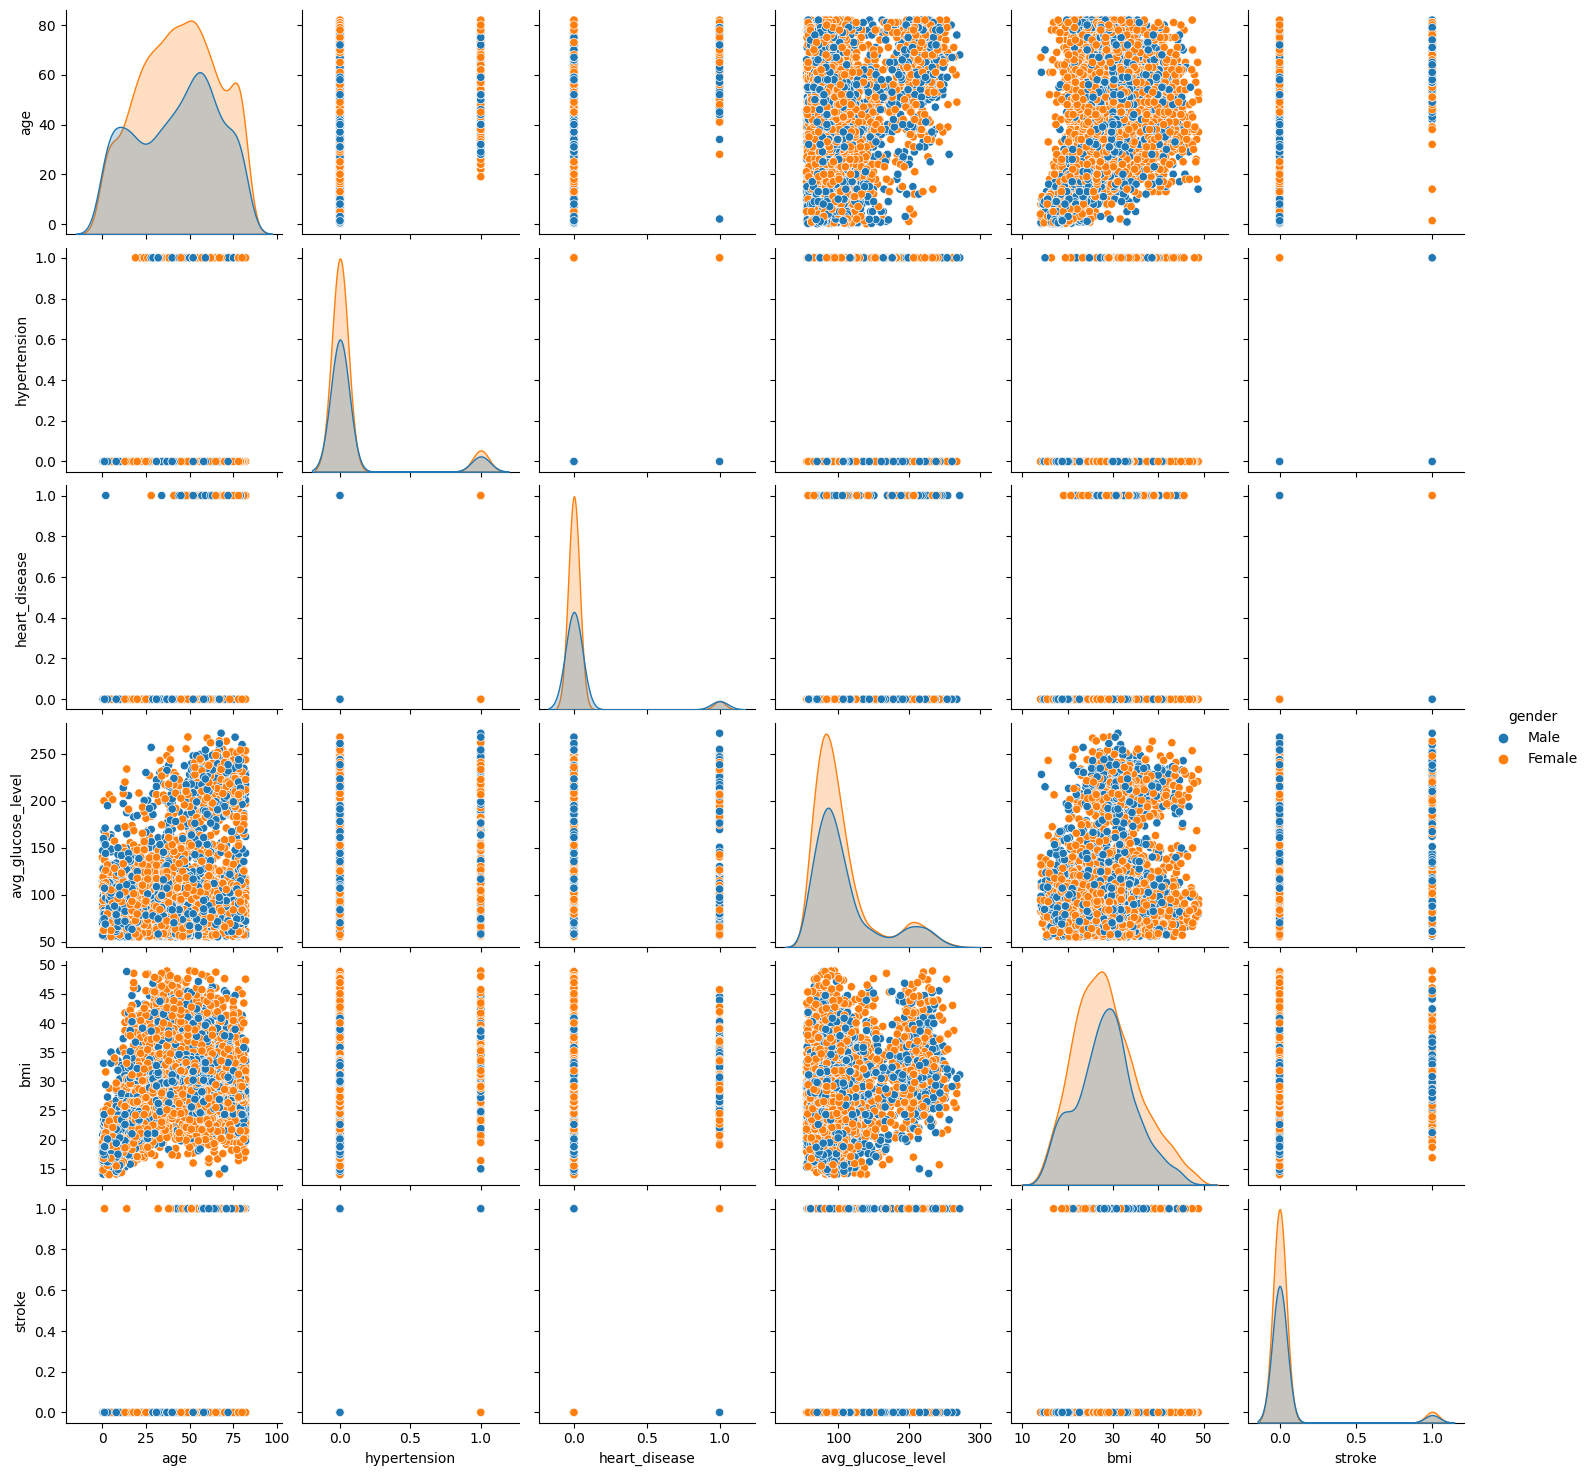

In [132]:

sns.pairplot(brain_df, diag_kind='kde', hue='gender')

C:\Users\Rithi\AppData\Roaming\SPB_Data\.virtualenvs\Rithi-sA_9Ju7I\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:ylabel='Density'>

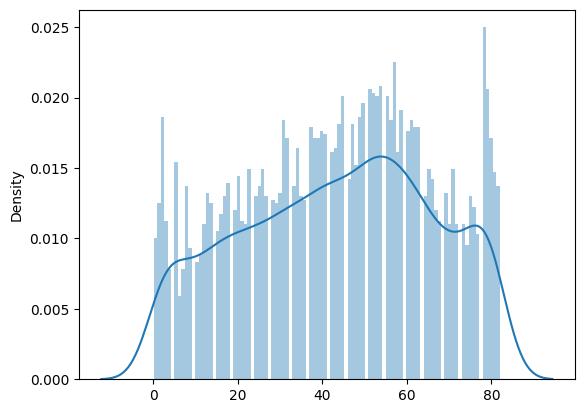

In [133]:
sns.distplot(x=brain_df.age, bins=100)

Observation:  The majority of sample size lies within the 40 - 60 years range.

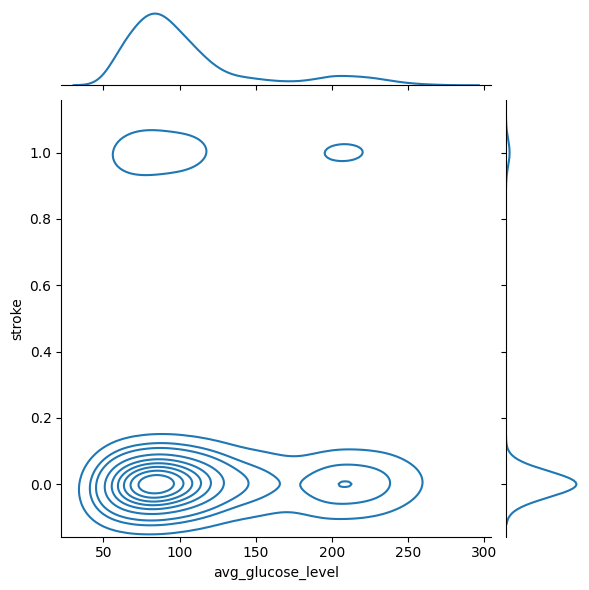

In [134]:
sns.jointplot(x='avg_glucose_level', y='stroke', data=brain_df, kind='kde')

Observation: It seems that that the patients with an average glucose level in the range of 50 - 250 tend to not have stroke

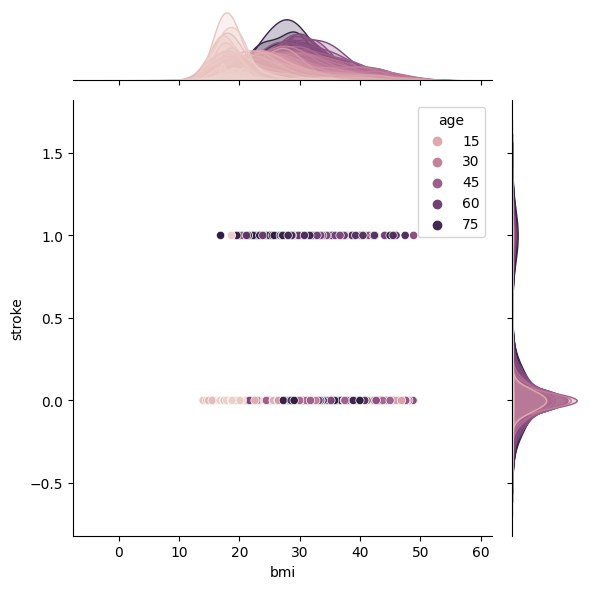

In [135]:
sns.jointplot(x='bmi', y='stroke', data=brain_df, kind='scatter', hue='age')
plt.tight_layout()

It can be seen that the majority of older patients are more likely to get stroke

## Look at Categorical Features

<AxesSubplot:xlabel='gender', ylabel='count'>

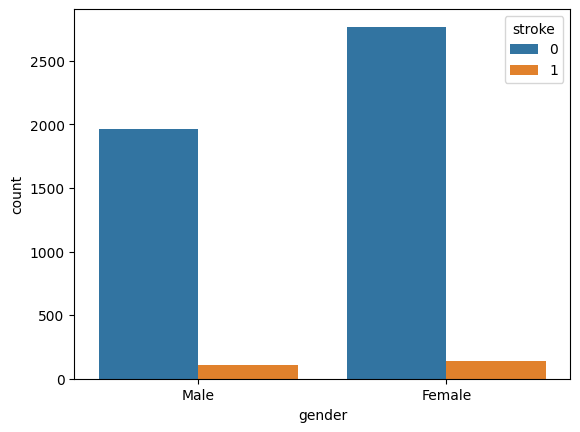

In [136]:
sns.countplot(x='gender', data=brain_df, hue='stroke')

The majority of males and females tend to not have stroke.

In [137]:
brain_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [138]:
le = LabelEncoder()
brain_df['work_type_transformed'] = le.fit_transform(brain_df['work_type'])
brain_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_transformed
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,2
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1


In [139]:
brain_df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [140]:
brain_df.work_type_transformed.unique()

array([1, 2, 0, 3])

## Feature Engineering



### Look at Missing Values

In [141]:
brain_df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status           0
stroke                   0
work_type_transformed    0
dtype: int64

<AxesSubplot:>

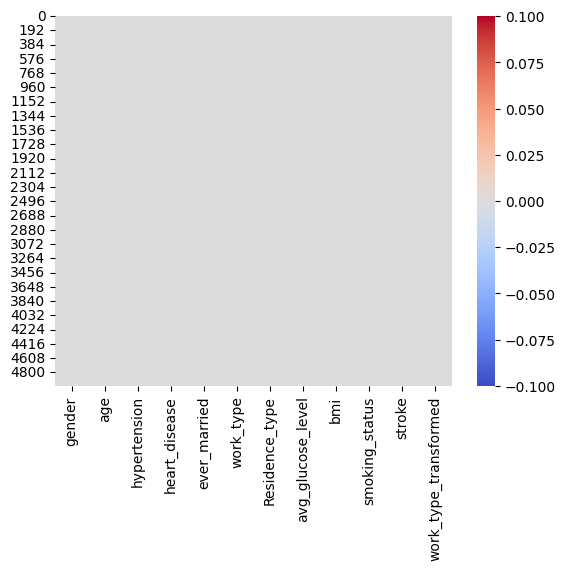

In [142]:
sns.heatmap(brain_df.isnull(), cmap='coolwarm')

Observation: No Missing Values

In [143]:
# this function performs the necessary feature engineering steps
def preprocess(brain_df):
    
    # Deduplicating all columns
    brain_df = brain_df.drop_duplicates(subset=brain_df.columns.to_list())
    
    # Perform One-Hot Encoding to Convert Categorical Features with 2 unique values to numerical form
    gender_df = pd.get_dummies(brain_df['gender'], drop_first=True)
    ever_married_df = pd.get_dummies(brain_df['ever_married'], drop_first=True)
    residence_type_df = pd.get_dummies(brain_df['Residence_type'], drop_first=True)
    residence_type_df.rename(columns={'Urban': 'Residence_Type'}, inplace=True)
    ever_married_df.rename(columns={'Yes': 'Ever_Married'}, inplace=True)
    gender_df.rename(columns={'Male': 'Gender'}, inplace=True)
    brain_df.drop(['gender', 'ever_married', 'Residence_type'], axis = 1, inplace=True)
    brain_df['Gender'] = gender_df['Gender']
    brain_df['Ever_Married'] = ever_married_df['Ever_Married']
    brain_df['Residence_Type'] = residence_type_df['Residence_Type']
    
    # Perform Label Encoding to Convert Categorical Features with more than 2 unique values to numerical form
    le = LabelEncoder()
    brain_df['work_type'] = le.fit_transform(brain_df['work_type'])
    brain_df['smoking_status'] = le.fit_transform(brain_df['smoking_status'])
    
    # Handling Imbalanced Dataset => UpSampling
    # Upsampling
    minority_df = brain_df[brain_df['stroke'] == 1]


    minority_df = resample(minority_df, n_samples=brain_df['stroke'].value_counts().max() - brain_df['stroke'].value_counts().min(), replace=True, random_state=101)
    brain_df = pd.concat([brain_df, minority_df])
    
    # Feature Scaling to perform Standardization 
    ss = StandardScaler()

    brain_df['avg_glucose_level'] = ss.fit_transform(brain_df['avg_glucose_level'].values.reshape(-1,1))
    brain_df['bmi'] = ss.fit_transform(brain_df['bmi'].values.reshape(-1,1))
    brain_df['age'] = ss.fit_transform(brain_df['age'].values.reshape(-1,1))
    return brain_df

brain_df = preprocess(brain_df)
brain_df.head(25)

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_transformed,Gender,Ever_Married,Residence_Type
0,0.535330,0,1,1,1.981020,1.154658,1,1,1,1,1,1
1,1.117817,0,1,1,-0.233348,0.509876,2,1,1,1,1,0
2,-0.271190,0,0,1,0.944631,0.808677,3,1,1,0,1,1
3,1.073010,1,0,2,0.996757,-0.826866,2,1,2,0,1,0
4,1.162623,0,0,1,1.214821,-0.040547,1,1,1,1,1,1
5,0.848977,1,1,1,-0.879603,-0.292169,2,1,1,1,1,0
6,0.624943,0,0,1,-0.441311,-1.015582,2,1,1,0,0,1
7,1.028203,0,0,1,-1.087386,-0.795413,0,1,1,0,1,1
8,1.162623,1,0,1,-0.693104,0.069538,2,1,1,0,1,0
9,0.266490,0,1,0,0.028906,1.186110,3,1,0,0,1,0


In [144]:
# Feature Selection 
# All the unique columns have values that are not highly correlated as they are all good to be used (<0.7)
brain_df.corr()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_transformed,Gender,Ever_Married,Residence_Type
age,1.000000,0.275079,0.266911,-0.298797,0.272496,0.225422,0.168860,0.578503,-0.298797,0.016031,0.564501,0.038107
hypertension,0.275079,1.000000,0.075013,-0.004776,0.188758,0.133022,0.134599,0.237233,-0.004776,0.008875,0.100993,-0.011984
heart_disease,0.266911,0.075013,1.000000,-0.069898,0.258892,0.066172,0.080474,0.219363,-0.069898,0.125721,0.089455,0.032366
work_type,-0.298797,-0.004776,-0.069898,1.000000,-0.108473,-0.254204,-0.219903,-0.095976,1.000000,0.031755,-0.290568,-0.028952
avg_glucose_level,0.272496,0.188758,0.258892,-0.108473,1.000000,0.268249,0.079934,0.257714,-0.108473,0.111071,0.197916,0.033375
bmi,0.225422,0.133022,0.066172,-0.254204,0.268249,1.000000,0.172283,0.133380,-0.254204,0.028653,0.281444,0.049545
smoking_status,0.168860,0.134599,0.080474,-0.219903,0.079934,0.172283,1.000000,0.073378,-0.219903,-0.052763,0.188416,-0.005914
stroke,0.578503,0.237233,0.219363,-0.095976,0.257714,0.133380,0.073378,1.000000,-0.095976,0.025408,0.278783,0.049112
work_type_transformed,-0.298797,-0.004776,-0.069898,1.000000,-0.108473,-0.254204,-0.219903,-0.095976,1.000000,0.031755,-0.290568,-0.028952
Gender,0.016031,0.008875,0.125721,0.031755,0.111071,0.028653,-0.052763,0.025408,0.031755,1.000000,0.028799,-0.003804


In [145]:
# Prepare the Machine Learning Model for Model Building
def model_prep():
    X = brain_df.drop('stroke', axis = 1)
    print(X)
    y = brain_df['stroke'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = model_prep()

          age  hypertension  heart_disease  work_type  avg_glucose_level  \
0    0.535330             0              1          1           1.981020   
1    1.117817             0              1          1          -0.233348   
2   -0.271190             0              0          1           0.944631   
3    1.073010             1              0          2           0.996757   
4    1.162623             0              0          1           1.214821   
..        ...           ...            ...        ...                ...   
104  0.759363             0              0          0           0.226408   
154  0.445717             0              0          1           1.567619   
199  0.221683             0              1          1          -0.485862   
172 -0.719256             0              0          1          -0.642420   
96   0.266490             1              0          2          -0.771022   

          bmi  smoking_status  work_type_transformed  Gender  Ever_Married  \
0    1.15

In [146]:
# Train the ML model using training set
def train_model(X_train, y_train):
    lsvc = SVC(kernel='linear')
    lsvc.fit(X_train, y_train)
    return lsvc
lsvc = train_model(X_train, y_train)

In [147]:
# Evaluate the Model using Classification Metrics
def evaluate_model(model):
    predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    return acc_score, class_report, conf_matrix
acc_score, class_report, conf_matrix = evaluate_model(lsvc)
print("SVM accuracy score: \n", acc_score)
print("-------------------------------")
print("SVM classification report: \n", class_report)
print("-------------------------------")
print("SVM confusion matrix: \n", conf_matrix)

SVM accuracy score: 
 0.7666314677930306
-------------------------------
SVM classification report: 
               precision    recall  f1-score   support

           0       0.81      0.72      0.76       972
           1       0.73      0.82      0.77       922

    accuracy                           0.77      1894
   macro avg       0.77      0.77      0.77      1894
weighted avg       0.77      0.77      0.77      1894

-------------------------------
SVM confusion matrix: 
 [[696 276]
 [166 756]]


In [148]:
param_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'max_iter': [10, 100, 1000]},
              {'C': [1, 10, 100, 1000], 'kernel':['linear'], 'max_iter': [10, 100, 1000], 'gamma': [0.1, 1, 10, 100]},
              {'C': [1, 10, 100, 1000], 'kernel':['poly'], 'max_iter': [10, 100, 1000], 'degree': [1, 2, 3, 4, 5], 'gamma': [0.1, 1, 10, 100]}]
# this function performs hyperparameter tuning based on the model
def hyperparameter_tuning(model):
    
    rs =RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=10, n_jobs=-1)
    rs.fit(X_train, y_train)
    
    return rs.best_params_
model_param = hyperparameter_tuning(lsvc)
print(model_param)

{'max_iter': 1000, 'kernel': 'poly', 'gamma': 0.1, 'degree': 5, 'C': 10}


C:\Users\Rithi\AppData\Roaming\SPB_Data\.virtualenvs\Rithi-sA_9Ju7I\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [149]:
# This function retrains the model based on the Machine Learning Model
def retrain_model(class_model):
    class_model.fit(X_train, y_train)
    pred = class_model.predict(X_test)
    return class_model, accuracy_score(pred, y_test)
class_model, results = retrain_model(class_model=SVC(C=model_param['C'], kernel=model_param['kernel'], max_iter = model_param['max_iter'], gamma=model_param['gamma'], degree = model_param['degree']))
print("SVM Results: ", results)

C:\Users\Rithi\AppData\Roaming\SPB_Data\.virtualenvs\Rithi-sA_9Ju7I\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVM Results:  0.5263991552270327


In [150]:
# Hyperparameter Tuning for Decision Tree
param_grid = {'criterion': ['gini' ,'entropy', 'log_loss'], 'splitter':['best', 'random'], 'max_depth':[10, 15, 20, 25, 30, 35],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8]}
model_param = hyperparameter_tuning(model=DecisionTreeClassifier())
print(model_param)

{'splitter': 'best', 'min_samples_split': 2, 'max_depth': 30, 'criterion': 'gini'}


C:\Users\Rithi\AppData\Roaming\SPB_Data\.virtualenvs\Rithi-sA_9Ju7I\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rithi\AppData\Roaming\SPB_Data\.virtualenvs\Rithi-sA_9Ju7I\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rithi\AppData\Roaming\SPB_Data\.virtualenvs\Rithi-sA_9Ju7I\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\Rithi\AppData\Roaming\SPB_Data\.virtu

In [151]:
# Retrain Decision Tree with best model parameters
dtc = DecisionTreeClassifier(criterion= model_param['criterion'], max_depth=model_param['max_depth'], min_samples_split=model_param['min_samples_split'], splitter=model_param['splitter'])
class_model, updated_results = retrain_model(dtc)
print("Decision Tree Accuracy: ", updated_results)

Decision Tree Accuracy:  0.9683210137275607


In [152]:
# Evaluate the Decision Tree Metrics
acc_score, class_report, conf_matrix = evaluate_model(class_model)
print("Decision Tree accuracy score: \n", acc_score)
print("-------------------------------")
print("Decision Tree classification report: \n", class_report)
print("-------------------------------")
print("Decision Tree confusion matrix: \n", conf_matrix)

Decision Tree accuracy score: 
 0.9683210137275607
-------------------------------
Decision Tree classification report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       972
           1       0.94      1.00      0.97       922

    accuracy                           0.97      1894
   macro avg       0.97      0.97      0.97      1894
weighted avg       0.97      0.97      0.97      1894

-------------------------------
Decision Tree confusion matrix: 
 [[912  60]
 [  0 922]]


Precision and Recall are fairly the same and the accuracy is high, so the Decision Tree Classifier is the best

In [153]:
import joblib
joblib.dump(dtc, 'model.pkl')

['model.pkl']

In [154]:
brain_df.work_type.unique()

array([1, 2, 0, 3])